In [1]:
import numpy as np
from numpy import cos, sin

import matplotlib.pyplot as plt
import matplotlib.animation as animation

from scipy.optimize import fsolve
from scipy.integrate import odeint

%matplotlib ipympl

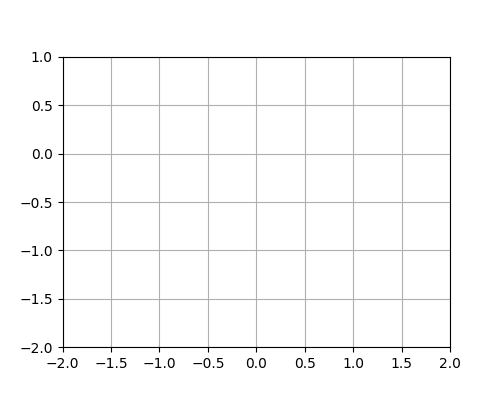

In [4]:
def model(x, t, w):
    
    phi, theta, v_phi, v_theta = x
    m, M = w
    f1 = np.cos(theta-phi)
    f2 = m/(M+m)*np.cos(theta-phi)
    g1 = (v_theta**2)*np.sin(theta-phi) - np.sin(phi)
    g2 = (v_phi**2)*(-m/(M+m)*np.sin(theta-phi)) - np.sin(theta)
    a_phi = (g1-f1*g2) / (1-f1*f2)
    a_theta = (-f2*g1+g2) / (1-f1*f2)
    return [v_phi, v_theta, a_phi, a_theta]

# initial conditions
m = 1 # kg
M = 2 # kg
l = 1 # length of each rod
phi0 = np.pi/2
theta0 = np.pi/2
v_phi0 = 0.0
v_theta0 = 0
t = np.linspace(0, 100)

phi, theta, v_phi, v_theta = odeint(model, [phi0, theta0, v_phi0, v_theta0], t, args=([m, M],)).T

x1 = l*sin(theta)
y1 = -l*cos(theta)

x2 = l*sin(phi) + x1
y2 = -l*cos(phi) + y1

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(autoscale_on=False, xlim=(-2*l, 2*l), ylim=(-2*l, 1.))
ax.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
trace, = ax.plot([], [], '.-', lw=1, ms=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    history_x = x2[:i]
    history_y = y2[:i]

    line.set_data(thisx, thisy)
    trace.set_data(history_x, history_y)
    time_text.set_text(time_template % (i*0.01))
    return line, trace, time_text

ani = animation.FuncAnimation(fig, animate, 4, interval=0.01*1000, blit=True)
plt.show()